$$\text{Smart Regonition Model: Hand Gestures}$$

In [23]:
import os
import cv2

In [ ]:
# Create a new directory to store dataset of images for hand recognition

def makedir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
    else:
        pass

In [2]:
curr_dir = os.getcwd()

# Dataset directory
data_dir = curr_dir + "\\hand_gestures_ds"

# Training directory + training gestures
train_data_dir = data_dir+"\\train"
train_data_dir_ges = train_data_dir+"\\train_Rthumbs_up"
train_data_dir_ges = train_data_dir+"\\train_Rthumbs_down"
train_data_dir_ges = train_data_dir+"\\train_Rindex_up"
train_data_dir_ges = train_data_dir+"\\train_Rindex_down"


# Validation directory + Validation gestures
valid_data_dir = data_dir+"\\valid"


valid_data_dir_ges = valid_data_dir+"\\valid_Rthumbs_up"


valid_data_dir_ges = valid_data_dir+"\\valid_Rthumbs_down"

valid_data_dir_ges = valid_data_dir+"\\valid_Rindex_up"


valid_data_dir_ges = valid_data_dir+"\\valid_Rindex_down"


In [4]:
def record_gesture(dir, gesture_dir, ges, num_frames):
    # Initialize the webcam and check if webcam was opened correctly
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Webcam was not opened successfully.")

    # Begin the data collection process
    try:
        frame_count = 0
        i = 0
        while i < 2:
            full_dir_path = os.path.join(dir, gesture_dir)            
            ret, frame = cap.read()
            
            # If frame is read correctly, succesful_ret is True
            if not ret:
                print("Can't receive frame.")
                break
            
            frame = cv2.flip(frame, 1)

            # Process the ROI, save the frame
            roi = frame[100:400, 320:620]
            roi = cv2.resize(roi, (256, 256), interpolation=cv2.INTER_AREA)
            cv2.imshow('Processed Frame', roi)
            
            # Draw rectangle for ROI and display the frame with the ROI
            copy = frame.copy()
            cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)

            if i == 0:
                frame_count = 0
                cv2.putText(copy, "Hit [ENTER] When Ready To Record!", (10,80), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1)
            if i == 1 and frame_count < num_frames:
                frame_count += 1
                cv2.putText(copy, f"Recording {ges} - Train", (10,80), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1)
                cv2.putText(copy, str(frame_count), (10,420), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 3)
                img_name = os.path.join(full_dir_path, f"{frame_count}.jpg")
                cv2.imwrite(img_name, roi)
            elif frame_count == num_frames: 
                cv2.putText(copy, "Hit [ENTER] To Exit!", (10,80), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1)
            cv2.imshow('Frame', copy)
            if cv2.waitKey(1) == 13:
                frame_count = 0
                i += 1

    finally:
        # Release the VideoCapture object and close display window
        cap.release()
        cv2.destroyAllWindows()

In [5]:
# Record different gestures
record_gesture(valid_data_dir, "valid_Rindex_down", "Right Index Down", 175)

2025-06-10 14:53:34.111 Python[7396:83066] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Random rotation between -20 to 20 degrees
    width_shift_range=0.2,   # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Random zoom
    fill_mode='nearest'      # Strategy for filling in newly created pixels
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "/Users/smithimahendran/Downloads/AI-Gesture-Controller-main/old_version/hand_gestures_ds/train/",
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    "/Users/smithimahendran/Downloads/AI-Gesture-Controller-main/old_version/hand_gestures_ds/valid/",
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)

Found 2000 images belonging to 4 classes.
Found 700 images belonging to 4 classes.


In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

model1 = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', input_shape=(244, 244, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    
    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    
    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    
    # Fourth convolutional block
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    
    # Flattening the layers and adding dense layers
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

# Compile the model
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Summary of the model architecture
model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 242, 242, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 242, 242, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 121, 121, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 121, 121, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 119, 119, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 119, 119, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 59, 59, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 59, 59, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 57, 57, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 57, 57, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 26, 26, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 26, 26, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 526,020 (2.01 MB)

 Trainable params: 524,036 (2.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [34]:
from keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Training the model

history = model1.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    callbacks=[early_stopping]
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.6203 - loss: 1.0878 - val_accuracy: 0.2500 - val_loss: 1.8720
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.8298 - loss: 0.4785 - val_accuracy: 0.2500 - val_loss: 6.7048
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.8713 - loss: 0.3333 - val_accuracy: 0.2500 - val_loss: 8.4736
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.9042 - loss: 0.2636 - val_accuracy: 0.2500 - val_loss: 12.1275
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9457 - loss: 0.1558 - val_accuracy: 0.2500 - val_loss: 10.2469
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.9446 - loss: 0.1611 - val_accuracy: 0.3514 - val_loss: 5.5398
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9556 - loss: 0.1184 - val_accuracy: 0.2500 - val_loss: 6.8825
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9722 - loss: 0.0818 - val_accuracy: 0.3314 - 

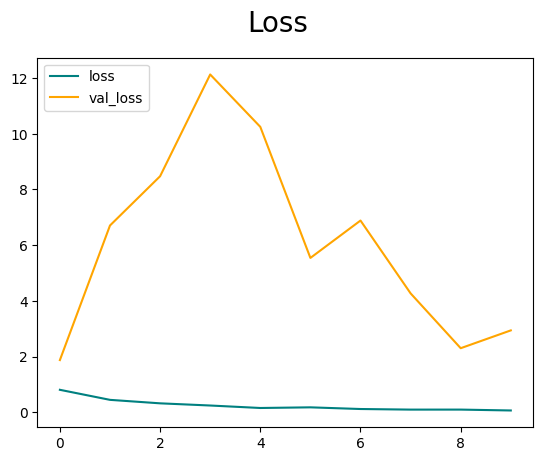

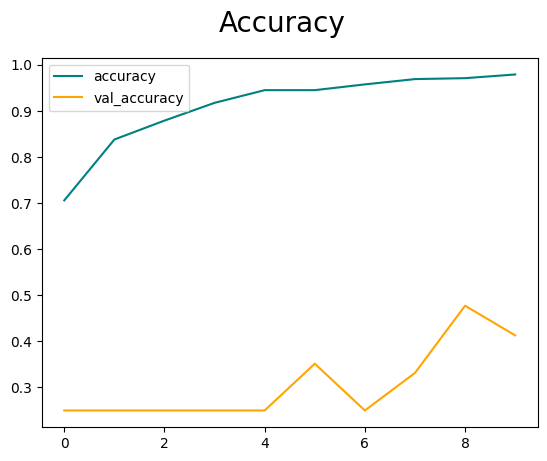

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

model1.save('model1.h5')

In [36]:
import tensorflow as tf
from keras.applications import MobileNetV2
from keras.layers import Dense, Dropout
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dropout, Dense
from keras.optimizers import Adam
# Load MobileNetV2 pre-trained on ImageNet without its top classification layer
base_model = MobileNetV2(weights='/Users/smithimahendran/Downloads/AI-Gesture-Controller-main/old_version/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5',
                         include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False  # or True if fine-tuning

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)  # 4 classes

# Full model
model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training parameters
train_samples = 2000
valid_samples = 700
epochs = 10

# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // 32,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_samples // 32,
    callbacks=[early_stopping]
)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 34s 517ms/step - accuracy: 0.4272 - loss: 1.4732 - val_accuracy: 0.6786 - val_loss: 0.9889
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.8125 - loss: 0.4466 - val_accuracy: 0.6696 - val_loss: 0.9913
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 34s 551ms/step - accuracy: 0.8025 - loss: 0.5218 - val_accuracy: 0.7396 - val_loss: 0.7324
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.6875 - loss: 0.6576 - val_accuracy: 0.7381 - val_loss: 0.7603
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 34s 554ms/step - accuracy: 0.8659 - loss: 0.3299 - val_accuracy: 0.7723 - val_loss: 0.6493
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.8750 - loss: 0.3550 - val_accuracy: 0.7768 - val_loss: 0.6443
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 34s 544ms/step - accuracy: 0.8851 - loss: 0.3038 - val_accuracy: 0.7500 - val_loss: 0.6833
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.9375 - loss: 0.2585 - val_accuracy

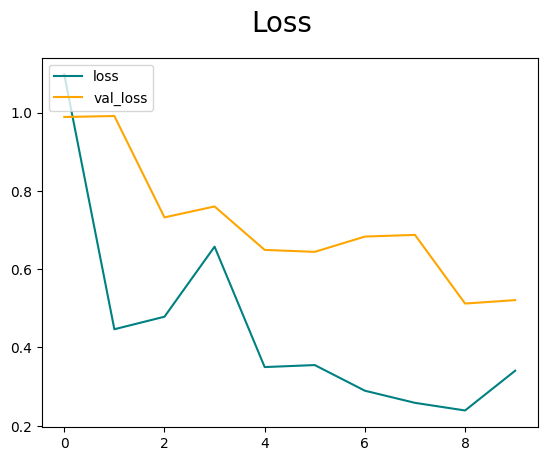

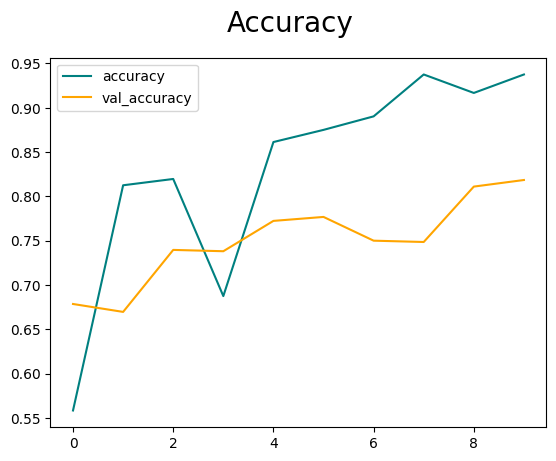

In [37]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

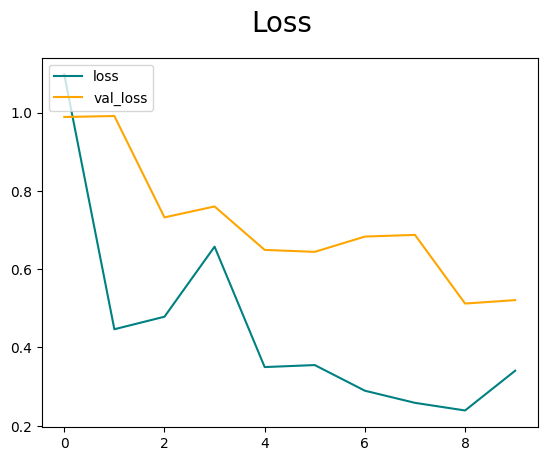

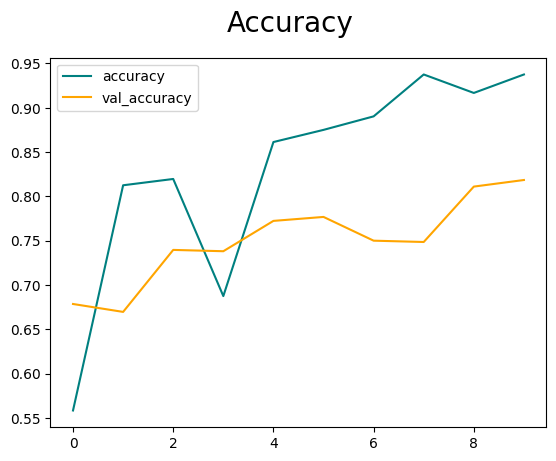

In [38]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

model.save('model2.h5')

In [39]:
import tensorflow as tf
from keras.applications import MobileNetV2
from keras.layers import Dense, Dropout
from keras.models import Model

# Load MobileNetV2 pre-trained on ImageNet without its top classification layer
base_model = MobileNetV2(weights='/Users/smithimahendran/Downloads/AI-Gesture-Controller-main/old_version/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5',
                         include_top=False, input_shape=(224,224,3), classes=4, pooling='avg')

base_model.trainable = False

# Create a new model on top
x = base_model.output
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x) 
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
# View the structure of the model
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_18[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,915,908 (11.12 MB)

 Trainable params: 657,924 (2.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [40]:
history = model.fit(train_generator, validation_data=valid_generator, epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 506ms/step - accuracy: 0.6922 - loss: 0.7612 - val_accuracy: 0.7529 - val_loss: 0.8353
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 494ms/step - accuracy: 0.9638 - loss: 0.1137 - val_accuracy: 0.7857 - val_loss: 0.6952
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 496ms/step - accuracy: 0.9546 - loss: 0.1142 - val_accuracy: 0.7486 - val_loss: 1.0100
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 494ms/step - accuracy: 0.9714 - loss: 0.0879 - val_accuracy: 0.7400 - val_loss: 1.0599
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 498ms/step - accuracy: 0.9885 - loss: 0.0491 - val_accuracy: 0.7357 - val_loss: 1.2207
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 499ms/step - accuracy: 0.9802 - loss: 0.0592 - val_accuracy: 0.8386 - val_loss: 0.6613
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 503ms/step - accuracy: 0.9840 - loss: 0.0475 - val_accuracy: 0.7143 - val_loss: 1.4330
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 499ms/step - accuracy: 0.9828 - loss: 0.0618 - val_accu

In [42]:
pip install pyautogui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.3/727.3 kB 17.6 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 35.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/171.2 kB 33.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.

In [64]:
import cv2
import numpy as np
import pyautogui
from keras.models import load_model
from keras.preprocessing.image import img_to_array

# Load gesture recognition model
model = load_model('model2.h5')

# Start video capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.flip(frame, 1)

    # Define region of interest (ROI)
    roi = frame[100:400, 320:620]
    roi_resized = cv2.resize(roi, (224, 224), interpolation=cv2.INTER_AREA)
    image = img_to_array(roi_resized) / 255.0
    image = np.expand_dims(image, axis=0)

    # Predict gesture
    prediction = np.argmax(model.predict(image), axis=1)

    # Draw rectangle and handle gesture
    display_frame = frame.copy()
    cv2.rectangle(display_frame, (320, 100), (620, 400), (255, 0, 0), 5)

    if prediction == [0]:  # index down
        cv2.putText(display_frame, "index down", (300, 100),
                    cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
        pyautogui.press('volumedown')

    elif prediction == [1]:  # index up
        cv2.putText(display_frame, "index up", (300, 100),
                    cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
        pyautogui.press('volumeup')

    elif prediction == [2]:  # thumbs down → screenshot
        cv2.putText(display_frame, "screenshot", (300, 100),
                    cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
        pyautogui.hotkey('command', 'shift', '4')

    elif prediction == [3]:  # thumbs up → switch app
        cv2.putText(display_frame, "switch app", (300, 100),
                    cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
        pyautogui.hotkey('command', 'tab')

    # Show frames
    cv2.imshow('Processed ROI', roi_resized)
    cv2.imshow('frame', display_frame)

    # Press Enter (keycode 13) to exit
    if cv2.waitKey(1) == 13:
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

In [65]:
from keras.models import load_model

model = load_model('model2.h5')

In [67]:
from keras.preprocessing.image import img_to_array, load_img
image = load_img('/Users/smithimahendran/Downloads/AI-Gesture-Controller-main/old_version/hand_gestures_ds/train/train_Rindex_up/3.jpg', target_size=(224, 224))
image = img_to_array(image)
image = image / 255.0
image = np.expand_dims(image, axis=0)

np.argmax(model.predict(image), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


array([1])